In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib.pyplot  as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold

import os

In [5]:
bankr = pd.read_csv(r"C:\Hogwarts\machine_learning\Cases\Bankruptcy\Bankruptcy.csv",
                   index_col = 0)

In [6]:
bankr.head()

,D,YR,R1,R2,R3,R4,R5,R6,R7,R8,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
NO,,,,,,,,,,,,,,,,,,,,,
1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,10.36,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,3.13,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,2.41,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,5.55,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,2.85,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06


In [8]:
X = bankr.drop(['D','YR'],
                axis = 1)
y = bankr['D']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 2022,
                                                    train_size = 0.7)

In [13]:
dtc = DecisionTreeClassifier(random_state= 2022,
                            max_depth = 3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2022)

In [24]:
plt.figure(figsize = (40,20))
        
plot_tree(dtc,feature_names= X.columns,
         class_names = ['0','1'], fontsize = 14)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 4000x2000 with 0 Axes>

In [15]:
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test , y_pred))

0.85


In [16]:
y_pred_prob = dtc.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test , y_pred))

0.8500000000000001


In [17]:
dtc = DecisionTreeClassifier(random_state= 2022)

In [18]:
param = {'max_depth':[2,3,4,5,None],
         'min_samples_split':[2,5,10],
         'min_samples_leaf':[1,5,10]}

In [19]:
kfold = StratifiedKFold(n_splits = 5,
                       shuffle = True,
                       random_state = 2022)

In [20]:
gcv  = GridSearchCV(dtc , param_grid = param, verbose=3,
                   cv = kfold,scoring='roc_auc')
gcv.fit(X,y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.808 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.865 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.751 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.947 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.917 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.808 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.865 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.751 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.947 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, m

[CV 3/5] END max_depth=3, min_samples_leaf=10, min_samples_split=5;, score=0.870 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=10, min_samples_split=5;, score=0.947 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=10, min_samples_split=5;, score=0.923 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=10, min_samples_split=10;, score=0.841 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=10, min_samples_split=10;, score=0.766 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=10, min_samples_split=10;, score=0.870 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=10, min_samples_split=10;, score=0.947 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=10, min_samples_split=10;, score=0.923 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.816 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.821 total time=   0.

[CV 1/5] END max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=0.841 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=0.766 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=0.870 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=0.947 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=0.929 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=0.841 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=0.766 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=0.870 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=0.947 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=0.929 total time=   0.0s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc', verbose=3)

In [21]:
print(gcv.best_params_)

{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [22]:
print(gcv.best_score_)

0.8730346576500422


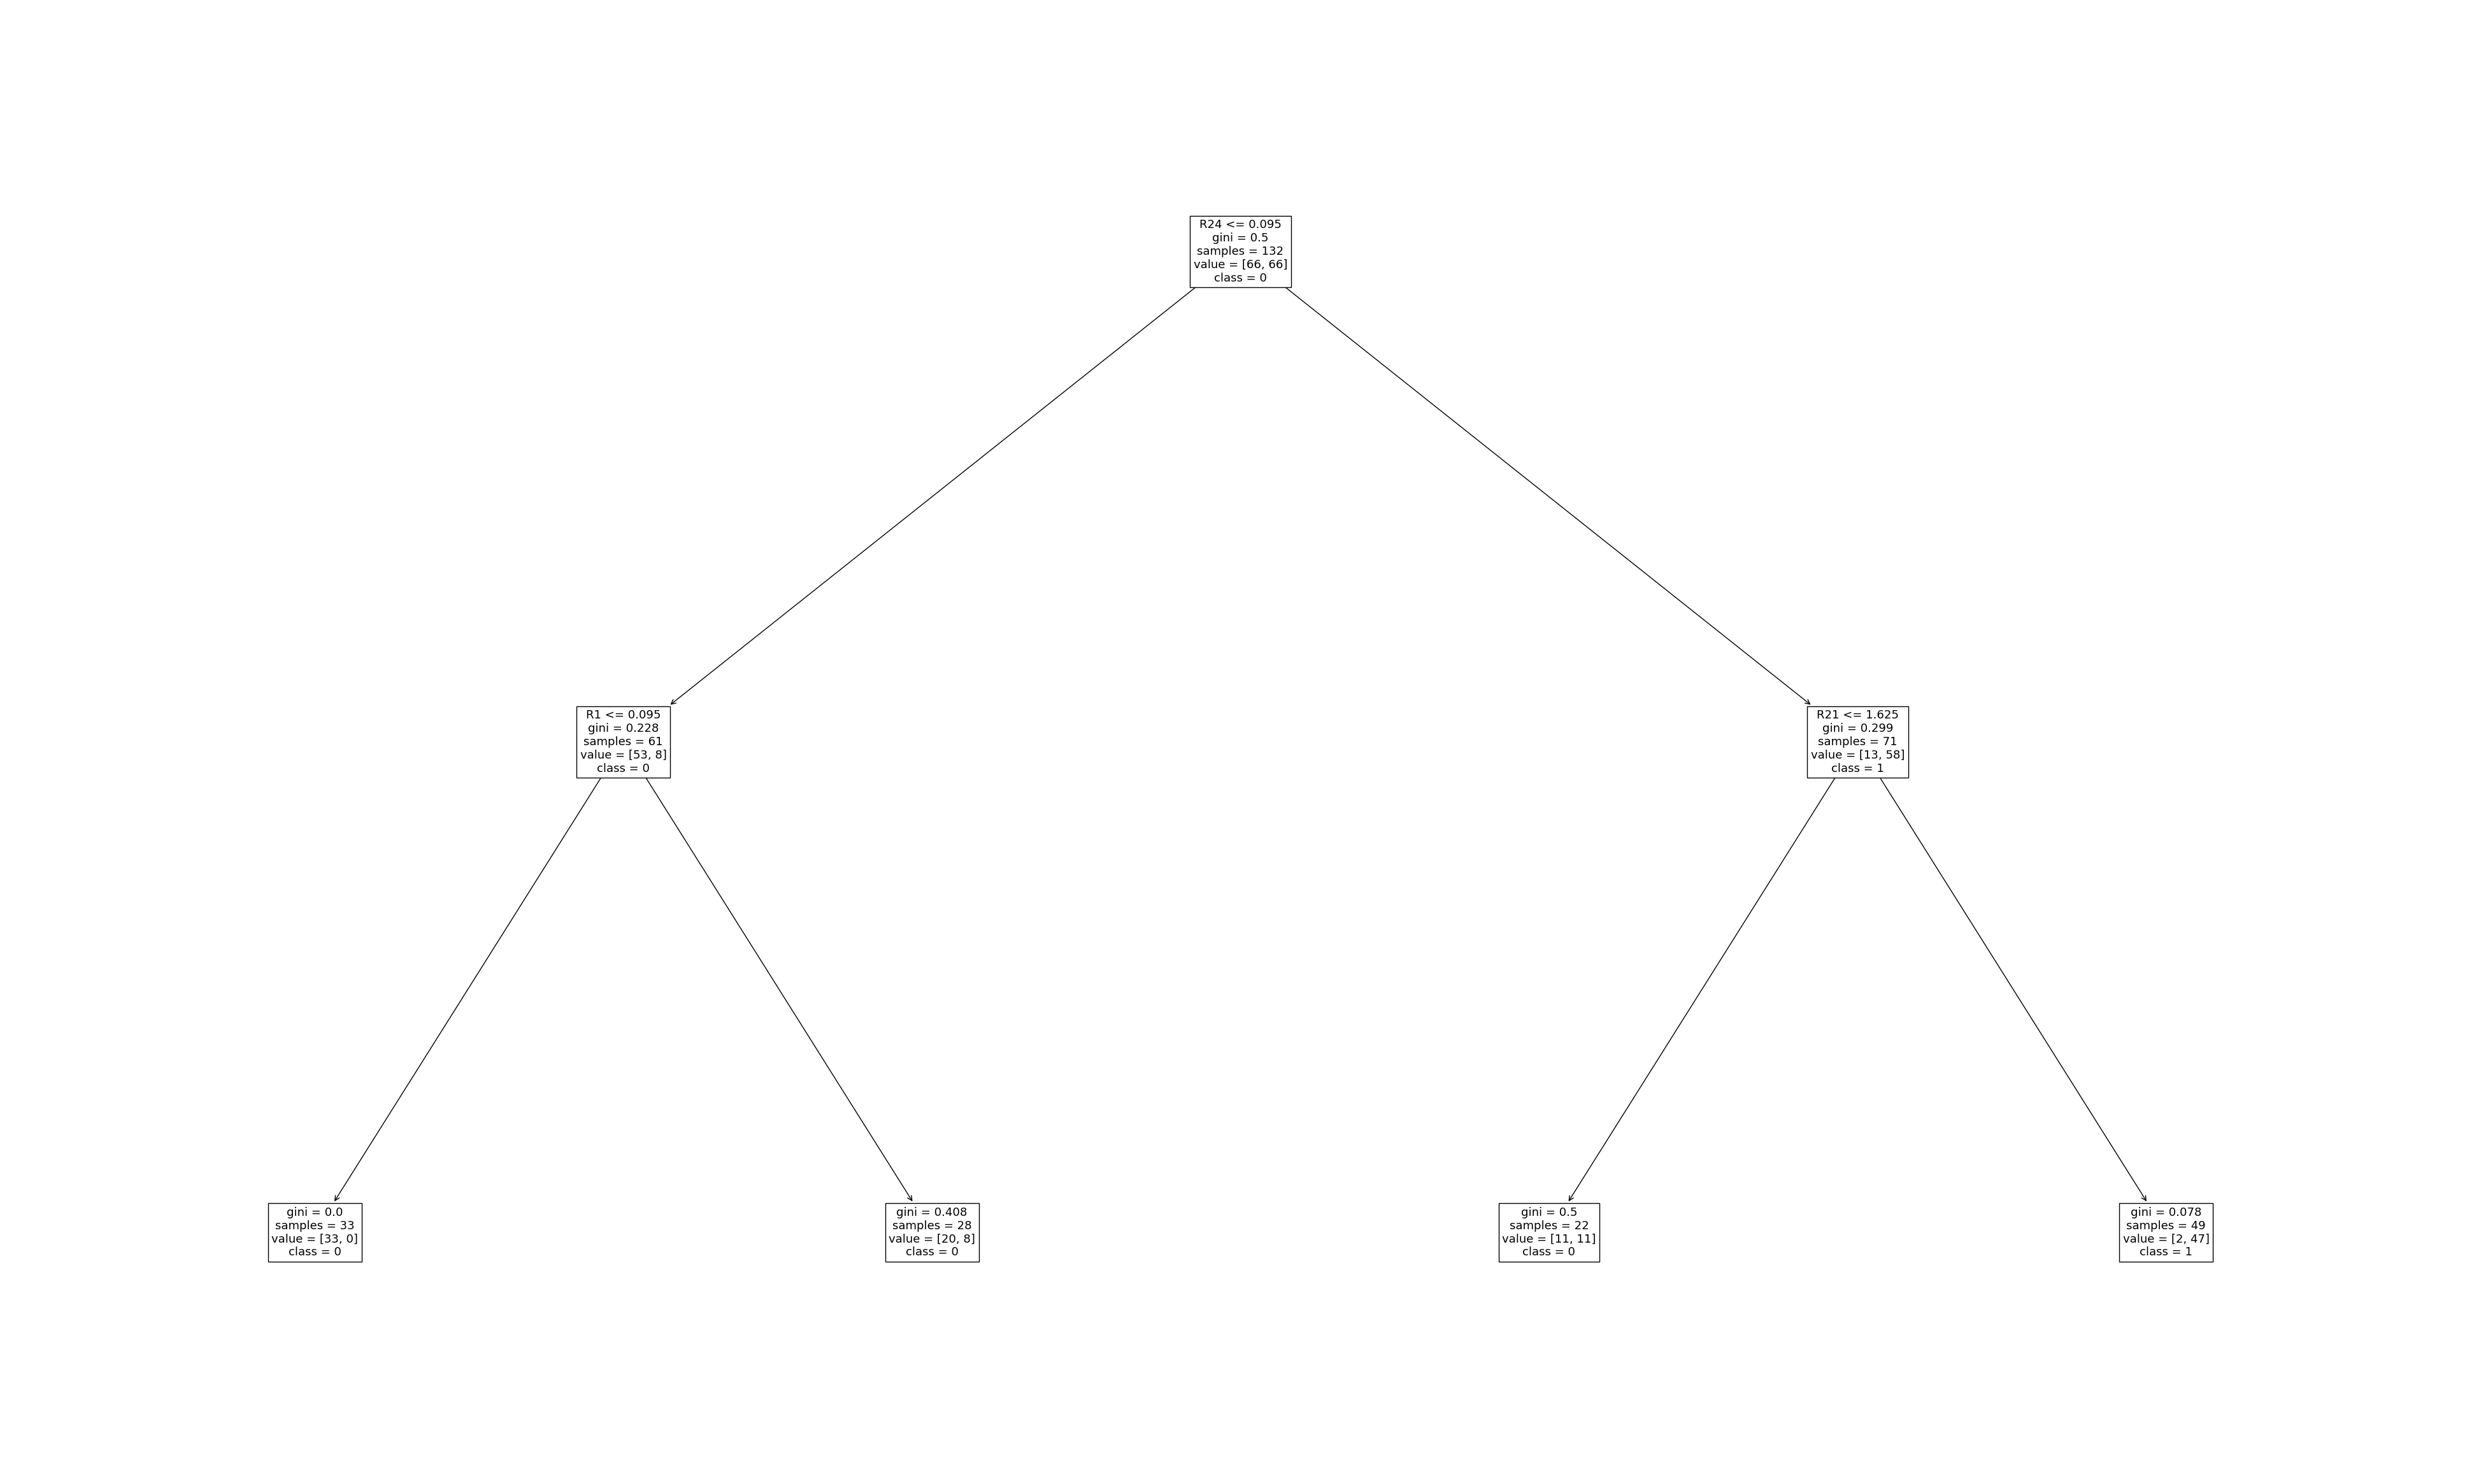

In [23]:
best_model = gcv.best_estimator_
plt.figure(figsize = (50,30))
plot_tree(best_model, feature_names=X.columns,class_names=['0','1'],fontsize= 13)
plt.show()